In [1]:
#run: pip install openquantumcomputing
from openquantumcomputing.QAOAMaxCut import QAOAMaxCut

In [2]:
from qiskit import *
import numpy as np
import networkx as nx

import matplotlib.pyplot as pl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from qiskit.visualization import *

Create a graph instance

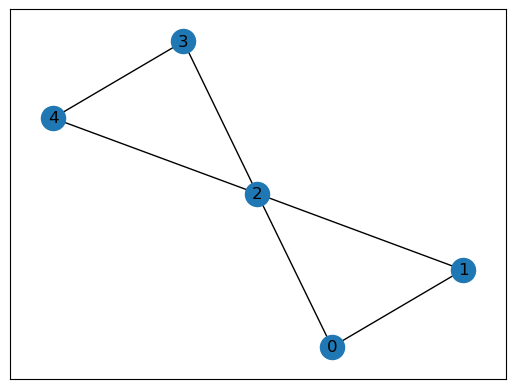

In [3]:
V = np.arange(0,5,1)
E = [(0,1,1.0),(0,2,1.0),(1,2,1.0),(3,2,1.0),(3,4,1.0),(4,2,1.0)] 

G = nx.Graph()
G.add_nodes_from(V)
G.add_weighted_edges_from(E)

pos = nx.spring_layout(G)
nx.draw_networkx(G,pos=pos)
k_cuts=2

Create a QAOA maxcut instance a draw the circuit at depth 1

In [4]:
params={'G': G, 'shots': 2048}
qaoamc = QAOAMaxCut(params=params)
qaoamc.createParameterizedCircuit(1)
qaoamc.parameterized_circuit.draw()

┌───┐                                                          »
q2_0: ┤ H ├──■───────────────────────■────■───────────────────────■──»
      ├───┤┌─┴─┐┌─────────────────┐┌─┴─┐  │                       │  »
q2_1: ┤ H ├┤ X ├┤ Rz(1.0*gamma_0) ├┤ X ├──┼───────────────────────┼──»
      ├───┤└───┘└─────────────────┘└───┘┌─┴─┐┌─────────────────┐┌─┴─┐»
q2_2: ┤ H ├─────────────────────────────┤ X ├┤ Rz(1.0*gamma_0) ├┤ X ├»
      ├───┤                             └───┘└─────────────────┘└───┘»
q2_3: ┤ H ├──────────────────────────────────────────────────────────»
      ├───┤                                                          »
q2_4: ┤ H ├──────────────────────────────────────────────────────────»
      └───┘                                                          »
c0: 5/═══════════════════════════════════════════════════════════════»
                                                                     »
«      ┌───────────────┐                                         »
«q2_0: ┤ Rx(-2*beta_0) ├─────────────────────────────────────────»
«      └───────────────┘                        ┌───────────────┐»
«q2_1: ────────■─────────────────────────────■──┤ Rx(-2*beta_0) ├»
«            ┌─┴─┐      ┌─────────────────┐┌─┴─┐└───────────────┘»
«q2_2: ──────┤ X ├──────┤ Rz(1.0*gamma_0) ├┤ X ├────────■────────»
«            └───┘      └─────────────────┘└───┘      ┌─┴─┐      »
«q2_3: ───────────────────────────────────────────────┤ X ├──────»
«                                                     └───┘      »
«q2_4: ──────────────────────────────────────────────────────────»
«                                                                »
«c0: 5/══════════════════════════════════════════════════════════»
«                                                                »
«                                                                            »
«q2_0: ──────────────────────────────────────────────────────────────────────»
«                                                                            »
«q2_1: ──────────────────────────────────────────────────────────────────────»
«                                                           ┌───────────────┐»
«q2_2: ─────────────────────■────■───────────────────────■──┤ Rx(-2*beta_0) ├»
«      ┌─────────────────┐┌─┴─┐  │                       │  └───────────────┘»
«q2_3: ┤ Rz(1.0*gamma_0) ├┤ X ├──┼───────────────────────┼──────────■────────»
«      └─────────────────┘└───┘┌─┴─┐┌─────────────────┐┌─┴─┐      ┌─┴─┐      »
«q2_4: ────────────────────────┤ X ├┤ Rz(1.0*gamma_0) ├┤ X ├──────┤ X ├──────»
«                              └───┘└─────────────────┘└───┘      └───┘      »
«c0: 5/══════════════════════════════════════════════════════════════════════»
«                                                                            »
«                                                ░ ┌─┐            
«q2_0: ──────────────────────────────────────────░─┤M├────────────
«                                                ░ └╥┘┌─┐         
«q2_1: ──────────────────────────────────────────░──╫─┤M├─────────
«                                                ░  ║ └╥┘┌─┐      
«q2_2: ──────────────────────────────────────────░──╫──╫─┤M├──────
«                              ┌───────────────┐ ░  ║  ║ └╥┘┌─┐   
«q2_3: ─────────────────────■──┤ Rx(-2*beta_0) ├─░──╫──╫──╫─┤M├───
«      ┌─────────────────┐┌─┴─┐├───────────────┤ ░  ║  ║  ║ └╥┘┌─┐
«q2_4: ┤ Rz(1.0*gamma_0) ├┤ X ├┤ Rx(-2*beta_0) ├─░──╫──╫──╫──╫─┤M├
«      └─────────────────┘└───┘└───────────────┘ ░  ║  ║  ║  ║ └╥┘
«c0: 5/═════════════════════════════════════════════╩══╩══╩══╩══╩═
«                                                   0  1  2  3  4

Sample the energy landscape of QAOA for depth 1 and draw it

Calculating Energy landscape for depth p=1...
Executing sample_cost_landscape
parameters:  2
Done execute
Done measurement
Calculating Energy landscape done


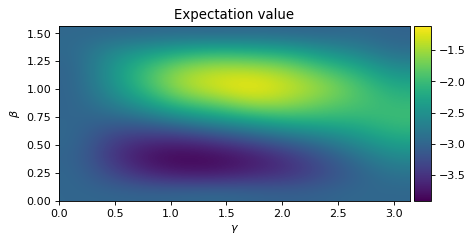

In [5]:
qaoamc.sample_cost_landscape(angles={"gamma": [0,np.pi/2,10], "beta": [0,np.pi/2,10]})
f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Expectation value')
im = ax.imshow(qaoamc.E,interpolation='bicubic',origin='lower',extent=[0,np.pi,0,np.pi/2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

Search for the best parameters at depth 1 and print the approximation ratio

In [6]:
qaoamc.increase_depth()
print("approximation ratio=", list(qaoamc.costval.values())[0]/-4)

cost(depth= 1 )= -3.9169921875
approximation ratio= 0.9814453124999999
